In [1]:
#pip install mlxtend

<h1 style="font-family:Calibri;color:black;font-size:197%;text-align:center">Master Data science - a.a. 2022-2023 
Final Project of Machine Learning</h1>
<h1 style=";font-family:Calibri;color:violet;font-size:170%;text-align:center;border-radius: px 50px;"> student: Laura Proto </h1>

<h1 style="background-color:#eaeaea;font-family:Calibri;color:#fe0b50;font-size:300%;text-align:center;border-radius: 50px;padding: 10px">The Stroke Prediction Dataset</h1>

In [2]:
from PIL import Image
from IPython.display import display, HTML
display(HTML("<div style='display:flex; justify-content:center;'><img src='stroke-main.jpg' style='max-width:100%;'></div>"))

## Il Dataset ---Riscrivere meglio

L'Organizzazione Mondiale della Sanità (OMS) riporta che l'ictus è la seconda causa di morte a livello mondiale e rappresenta circa l'11% di tutti i decessi. In base a variabili di input come sesso, età, varie malattie e stato di fumatore, questo set di dati* viene utilizzato per determinare se un paziente è a rischio di ictus. Le informazioni rilevanti sul paziente sono incluse in ogni riga dei dati.

Ictus è un termine latino che significa "colpo" (in inglese stroke). Insorge, infatti, in maniera improvvisa: una persona in pieno benessere può accusare sintomi tipici che possono essere transitori, restare costanti o peggiorare nelle ore successive.

Quando si verifica un’interruzione dell’apporto di sangue ossigenato oppure uno stravaso di sangue in un’area dell’encefalo, si determina la morte delle cellule nervose di quell’area. Di conseguenza, le funzioni neurologiche controllate da quell’area (che possono riguardare il movimento di un braccio o di una gamba, il linguaggio, la vista, l’udito, l’equilibrio o altro) vengono perse.

In Italia l’ictus è la seconda causa di morte, dopo le malattie ischemiche del cuore, è responsabile del 9-10% di tutti i decessi e rappresenta la prima causa di invalidità. 

*fonte: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Index</h1>

- [Libraries & Utilities](#1)
- [Data Preprocessing](#2)
    - [Importing Dataset](#2.1)
    - [Analysis of values](#2.2)
    - [Definition of the Data Transformation Pipeline](#2.3)
- [Model Selection: stroke](#3)
    - [Outcome](#3.1)
    - [Refinement of the selected model](#3.2)
    - [Learning curve](#3.3)
- [Another round with lifestyle](#4)  
    - [Model Selection: sport](#4.1) 
    - [Outcome](#4.2)
    - [Refinement of the selected model](#4.3)
    - [Learning curve](#4.4)
- [Conclusions](#5)

<a id = '1'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:blue;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Libraries</h1>

In [3]:
import utils as ut
import pandas as pd
import numpy as np
import seaborn as sns 
import itertools
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px

from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import display, HTML
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import loguniform, beta, uniform
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline


import warnings
warnings.filterwarnings('ignore')

<a id = '2'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Data Preprocessing</h1>

<a id = '2.1'></a>
<h1 style="font-size: 150%;">Importing Data set </h1>

In [4]:
#loading data
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter = ',')

In [5]:
#Dataframe 
df_stroke.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [6]:
#Dataset shape
print(f'Dataset has {df_stroke.shape[0]} rows and {df_stroke.shape[1]} columns')

Dataset has 5110 rows and 12 columns


<a id = '2.2'></a>
<h1 style="font-size: 150%;">Analysis of values</h1>

In [7]:
#info about DataFrame
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are three types of data in the dataset:
1. **object** (categorical) : gender, ever_married, work_type, Residence_type, smoking_status
2. **int64** (binary) : hypertension,heart_disease, stroke
3. **float64** (numerical) : age, avg_glucose_level, bmi

In [8]:
#unique column values with categorical data type
for col in df_stroke.select_dtypes('object').columns:
    print(col + "'s value:", df_stroke[col].unique().tolist())

gender's value: ['Male', 'Female', 'Other']
ever_married's value: ['Yes', 'No']
work_type's value: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Residence_type's value: ['Urban', 'Rural']
smoking_status's value: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']


In [9]:
#percentages of unknown values in the column smoking_status
counts = df_stroke['smoking_status'].value_counts()
num_unknown = counts.get('Unknown', 0)
total = df_stroke['smoking_status'].count()
percentage = (num_unknown / total) * 100
print(f"Percentage of 'Unknown' values in smoking_status's coloumn: {percentage:.2f}%")

Percentage of 'Unknown' values in smoking_status's coloumn: 30.22%


In [10]:
#transformation of unknown values into null values for processing in the transformation pipeline
df_stroke['smoking_status'] = df_stroke['smoking_status'].fillna('')

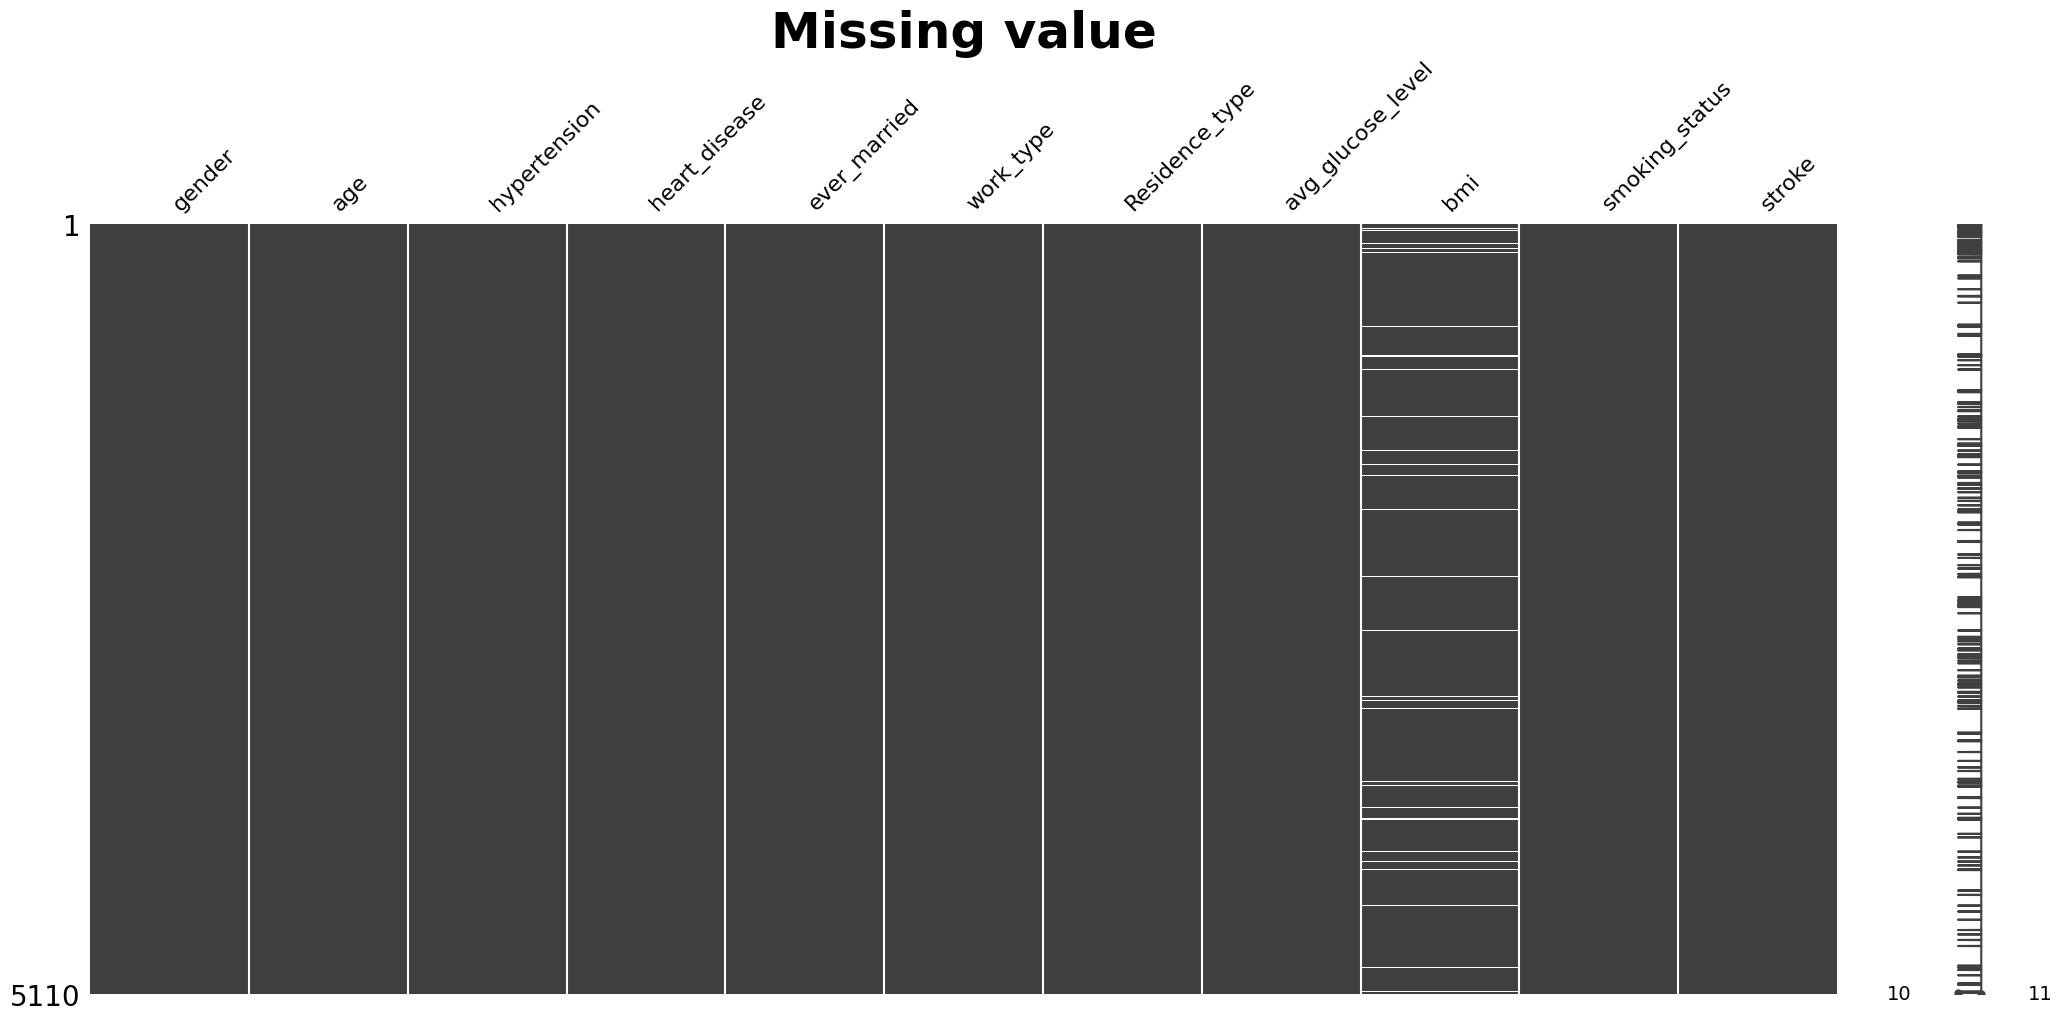

In [11]:
#search missing value
X = df_stroke.iloc[:, 1:14]  #select everything except the id column

fig = msno.matrix(X)
plt.title("Missing value", fontsize=36, fontweight='bold')
plt.show()

In [12]:
#count missing value
b_s= df_stroke.bmi.isnull().sum(axis=0), df_stroke['smoking_status'].isna().sum()
print(f'Missing value:\nbmi {b_s[0]}\nsmoking_status {b_s[1]}')

Missing value:
bmi 201
smoking_status 0


### Attribute Information

1. **id**: unique identifier

2. **gender**: Male, Female or Other

3. **age**: patient's age

4. **hypertension**: 0 patient without hypertension, 1 patient with hypertension

5. **heart disease**: 0 patient without heart disease, 1 patient with heart disease

6. **never_married**: Yes or No

7. **job type**: Never worked, Private, Self-employed, Government, Children

8. **Type_of_residence**: Rural or Urban

9. **avg_glucose_level**: Average blood glucose level

10. **bmi**: body mass index

11. **smoking_status**: has ever smoked, never smoked, smokes (or old-unknown)*

12. **stroke**: 1 if the patient has had a stroke, 0 if not

*Note: Information is not available for that patient

### Statistics of numerical data

In [13]:
round (df_stroke.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


### Statistics of categorical data

In [14]:
round (df_stroke.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


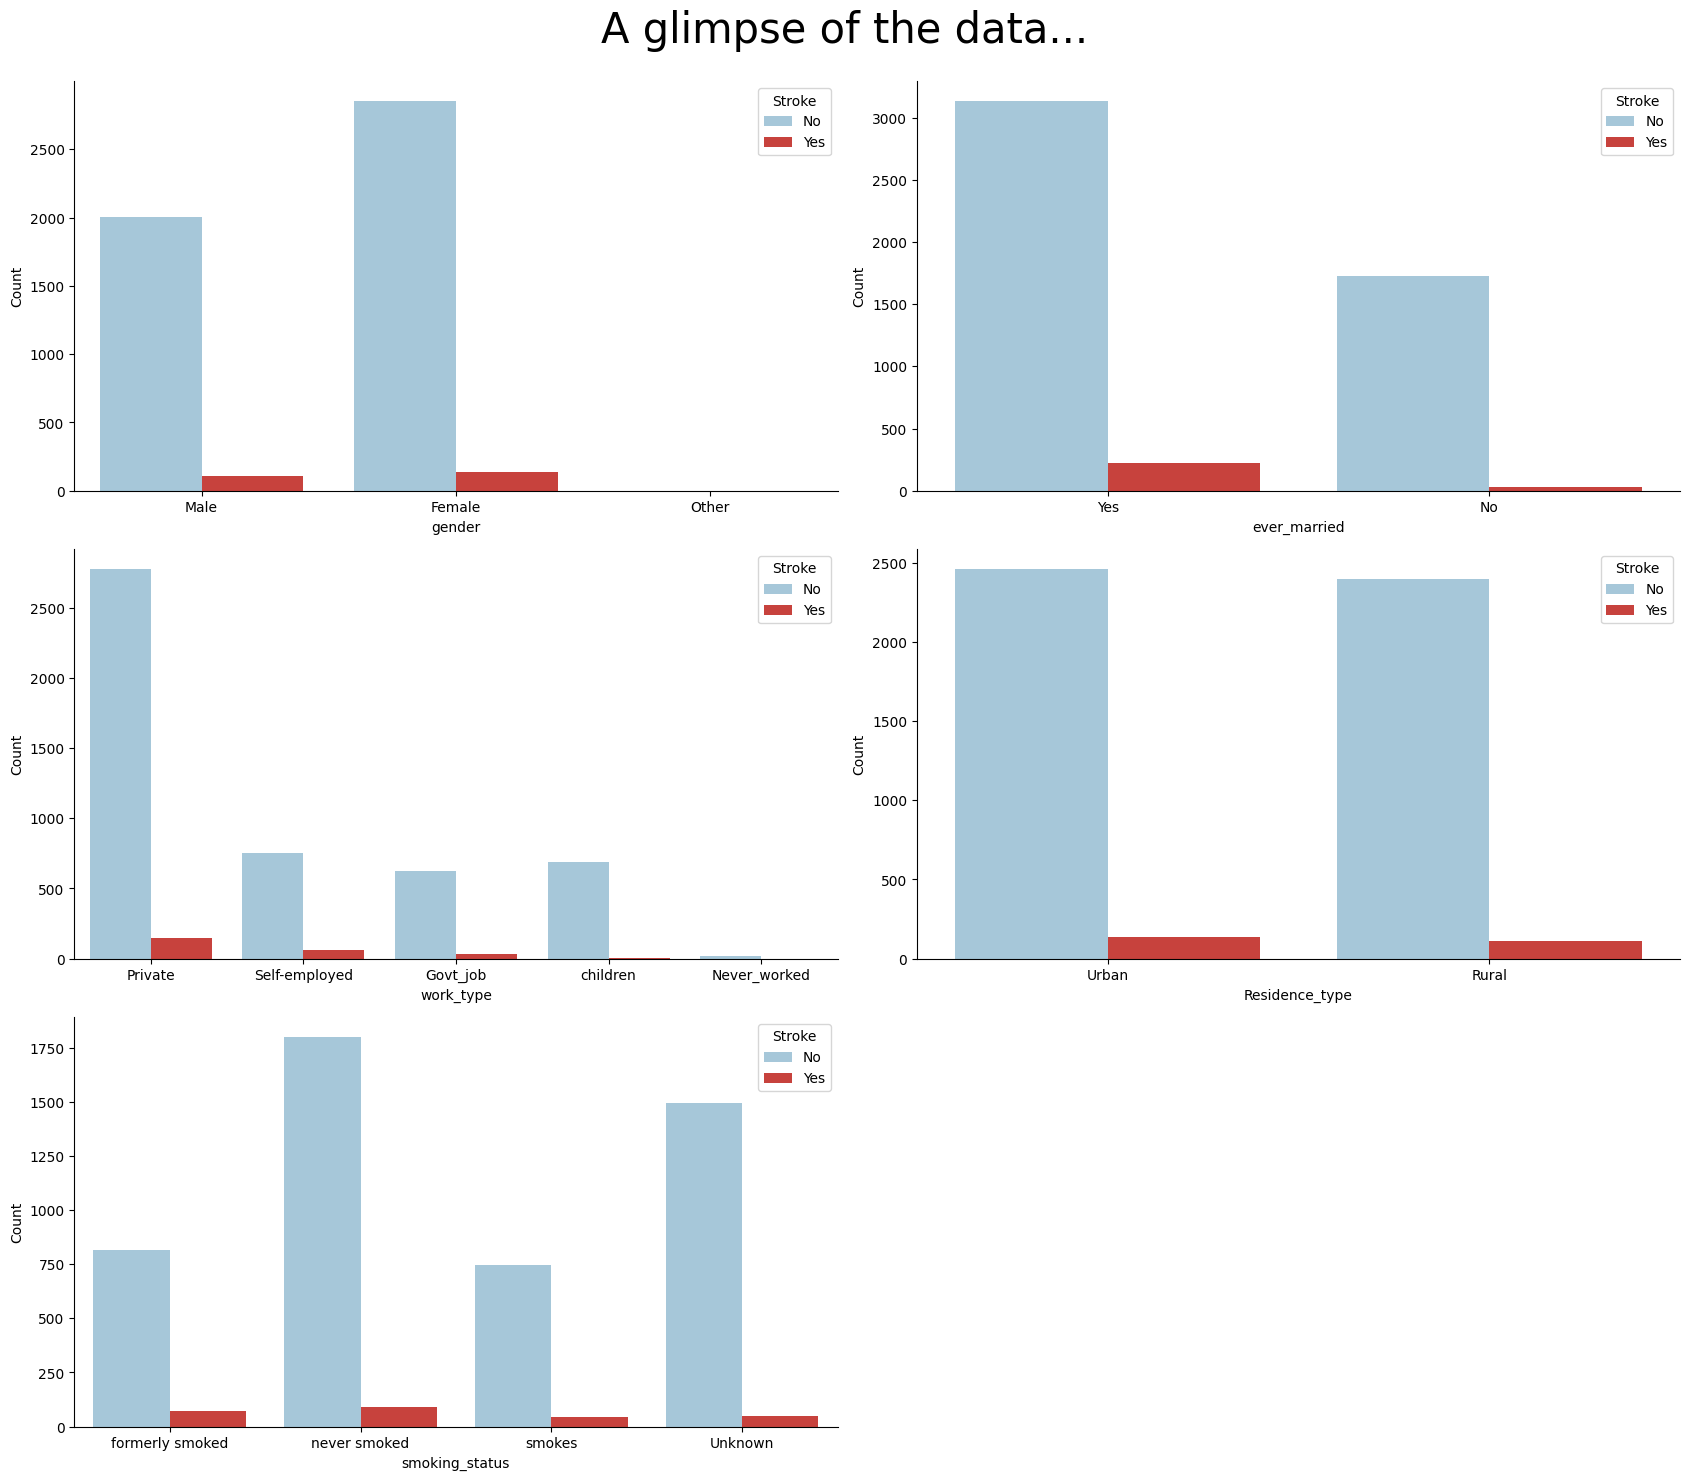

In [15]:
#
plt.figure(figsize=(17, 19))
plt.suptitle('A glimpse of the data...', fontsize=30, y=1)
custom_palette = ['#9ecae1','#de2d26']
sns.set_palette(custom_palette)
for i, column in enumerate(df_stroke.select_dtypes(include='object').columns, start=1):
    if column != "id":
        ax = plt.subplot(4, 2, i)
        sns.countplot(x=column, hue="stroke", data=df_stroke)
        ax.set_ylabel('Count')
        ax.legend(title='Stroke', labels=['No', 'Yes'])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
plt.tight_layout()
plt.show()

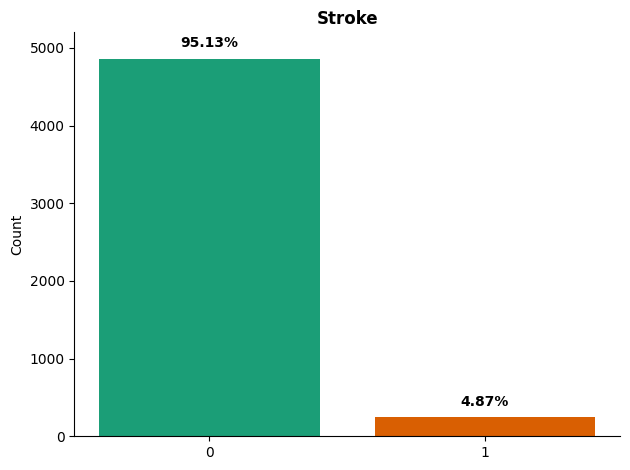

In [16]:
#graphic's stoke
plt.figure(figsize=(2, 2))
ut.bar_graphics (df_stroke,'stroke', 'Stroke', y_max=5200)
plt.tight_layout()
plt.show()

In [17]:
#stoke's coloumn value
counts = df_stroke['stroke'].value_counts()
num_zeros = counts[0]
num_one = counts[1]
print(f'The stroke column has {num_zeros} values equal to 0 and {num_one} values equal to 1')

The stroke column has 4861 values equal to 0 and 249 values equal to 1


<font size="4" color=red> Very few patients have had a stroke: the dataset is unbalanced </font>

<a id = '2.3'></a>
<h1 style="font-size: 150%;">Definition of the Data Transformation Pipeline </h1>

In [18]:
#show map's transformation
display(HTML("<div style='display:flex; justify-content:center;'><img src='pipeline.png' style='max-width:100%;'></div>"))

Columns not shown in the figure are not to be transformed.

In the dataset, all columns are complete except bmi and smoking_status.

In columns with categorical data: sex, always_married, work_type, residence_type and smoking_status; OneHot Encoder can be used.

The age column has numeric variables with different scales; Standard Scaler will be used to make them uniform.

For the bmi column, KNN Imputer will be used first to replace missing values with the closest ones; then Standard Scaler will also be used to make the values uniform.

Finally, for the smoking_status column, SimpleImputer will be used first to replace missing values with the most frequent ones and then, as already mentioned, OneHot Encoder will be used to transform the values.

In [19]:
#setting up the transformations
smoking_status_pip = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore'))
])

bmi_pip = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

final_transformation = ColumnTransformer(transformers=[
    ('one_hot_encoder', OneHotEncoder(drop='first',categories='auto',handle_unknown='ignore'),['gender','ever_married','work_type','Residence_type', 'smoking_status'] ),
    ('age_column', StandardScaler(),['age']),
    ('bmi_column', bmi_pip, ['bmi'] ),
    ('smoking_status_column', smoking_status_pip, ['smoking_status'] )
],
remainder='passthrough', #non fa nulla sulle colonne non menzionate
verbose_feature_names_out=False,
sparse_threshold=0 #per ottenere l'array
)

<a id = '3'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:green;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Model Selection: stroke</h1>

In [20]:
#select data 
id = df_stroke['id']
X = df_stroke.drop(['id', 'stroke'], axis=1) 
y = df_stroke["stroke"]  #select target column

n_samples, n_features = X.shape
n_samples, n_features

(5110, 10)

In [21]:
#sets the test dataset by 20% and the training dataset by 80%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=30, shuffle=True)

In [22]:
#proceed by defining a starting pipeline
model_pipeline = IMBPipeline([
    ('trans', final_transformation), #transformation of data
    ('sampler', SMOTE()), #balancing y
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [23]:
#training the model
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('age_column',
                                                  StandardScaler(), ['age']),
                                                 ('bmi_column',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('smoking_status_column',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [24]:
#predict
model_pipeline.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

In [25]:
#count's predict
np.set_printoptions(threshold=np.inf)
preds = model_pipeline.predict(X_test)
len(preds)

1022

In [26]:
#possible configurations
sampler_configs = [
    {
        'sampler':[None],#No dampsampling o upsampling 
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None] #No reduction
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [
    {
        'classifier__eta0' : loguniform(0.001,100),
        'classifier': [Perceptron()] ,
        'classifier__max_iter': [1,5,10,15,50,100] ,
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [10,50,100, 500]
    }
]

In [27]:
#creates possible configurations to be passed to RandomSearchCV object
all_configs = []
for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs):
    # Merging of three dictionary into one
    all_parameters = []
    for element in configuration:
        for item in element.items():
            all_parameters.append(item)
    all_configs.append(dict(all_parameters)) # by dict(all_parameters) we create a dict from a list of pairs (key:value)
    
print(f'Number of possible configurations: {len(all_configs)}')

Number of possible configurations: 48


In [28]:
#select the best candidates and optimizes hyperparameters 
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=1, #processors (-1 = All)
    cv = 2,
    scoring='f1'
)

In [29]:
#cross validation
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=5) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.209 total time= 4.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s


[CV] END ......................................., score=0.258 total time= 3.5min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.6min remaining:    0.0s


[CV] END ......................................., score=0.000 total time= 3.3min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.9min remaining:    0.0s


[CV] END ......................................., score=0.262 total time= 2.9min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 13.8min remaining:    0.0s


[CV] END ......................................., score=0.259 total time= 3.8min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.5min finished


<a id = '3.1'></a>
<h1 style="font-size: 150%;">Outcome</h1>

In [30]:
#print information on best-performing models
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],'\n',estimator.best_estimator_.get_params()['classifier'].get_params())
    print(f"{scores['test_score'][index]*100:.2f}%")
    print('-'*10)

SMOTE(n_jobs=-1, sampling_strategy=0.7)
SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          k_features=(5, 5), scoring='f1')
LogisticRegression(C=0.2172255091550136, penalty='l1', solver='saga') 
 {'C': 0.2172255091550136, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
20.94%
----------
RandomOverSampler(sampling_strategy='minority')
LinearDiscriminantAnalysis()
Perceptron(eta0=91.14653428709757, max_iter=100) 
 {'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 91.14653428709757, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 100, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
25.81%

In [55]:
#implement the above evaluation
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.22052067381316998, F1 on test set:0.22891566265060243
F1 on training set:0.024183006535947713, F1 on test set:0.021304926764314246
F1 on training set:0.2835130970724191, F1 on test set:0.28735632183908044
F1 on training set:0.25225225225225223, F1 on test set:0.2649006622516556
F1 on training set:0.2513464991023339, F1 on test set:0.271523178807947


<font size="4" color=magenta> The best is the penultimate model: </font> <font size="4"><b> LogisticRegression around 27%</font>

<a id = '3.2'></a>
<h1 style="font-size: 150%;">Refinement of the selected model</h1>

Previously, we selected one of the best candidate models. Now, we perform the hyperparameter optimization again by fixing the modelling approach and varying the hyperparameters in a range close to that of the selected 

RandomOverSampler(sampling_strategy=0.7)
LinearDiscriminantAnalysis()
LogisticRegression(C=42.24866889319029, penalty='l1', solver='saga') 
 {'C': 42.24866889319029, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
26.42%


SMOTE(n_jobs=-1, sampling_strategy=0.7)
LinearDiscriminantAnalysis()
LogisticRegression(C=0.025176747588744882, penalty='l1', solver='saga') 
 {'C': 0.025176747588744882, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
23.58%

In [56]:
#sets best pipline
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE(n_jobs=-1, sampling_strategy=0.7)), #processors (-1 = All)
    ('feature_selector', LDA()),
    ('classifier',LogisticRegression(solver='saga', penalty = 'l1'))
])

/Users/laura/opt/anaconda3/envs/master_unimi/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/laura/opt/anaconda3/envs/master_unimi/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/laura/opt/anaconda3/envs/master_unimi/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/laura/opt/anaconda3/envs/master_unimi/lib/python3.8/site-pac

In [33]:
#set up an even distribution
params = {
    'classifier__C': uniform(loc = 15, scale = 60)
}

In [34]:
#random search on the hyperparameters of the model represented by the best_model_pipeline
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring='f1'
)

In [35]:
#training the model
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['gender',
                                                                                'ever_married',
                                                                                'work_type',
                                                                                'Residence_type',
                                                                                'smoking_status']),
                                                                              ('age_co...
                                                                               ['smoking_status'])],
                                                                verbose_feature_names_out=False)),
                                             ('sampler',
                                              SMOTE(n_jobs=-1,
                                                    sampling_strategy=0.7)),
                                             ('feature_selector',
                                              LinearDiscriminantAnalysis()),
                                             ('classifier',
                                              LogisticRegression(penalty='l1',
                                                                 solver='saga'))]),
                   n_iter=20,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb3fa17d7f0>},
                   scoring='f1')

In [36]:
#model instance with the best found hyperparameters
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('age_column',
                                                  StandardScaler(), ['age']),
                                                 ('bmi_column',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   Stand...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(n_jobs=-1, sampling_strategy=0.7)),
                ('feature_selector', LinearDiscriminantAnalysis()),
                ('classifier',
                 LogisticRegression(C=21.40988035151834, penalty='l1',
                                    solver='saga'))])

In [37]:
#compute the F1-score on the test set
score=f1_score(y_test, rs_best.best_estimator_.predict(X_test))
m_score = round((score * 100), 2)
print(f'f1_score {m_score}%')
    

f1_score 25.43%


In [38]:
cls = rs_best.best_estimator_

In [39]:
#measuring the performance of the model on training datasets of increasing size and on test datasets
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = 1,
                                                       scoring = 'f1',
                                                       shuffle = False)

<a id = '3.3'></a>
<h1 style="font-size: 150%;">Learning curve</h1>

(300.0, 3300.0)

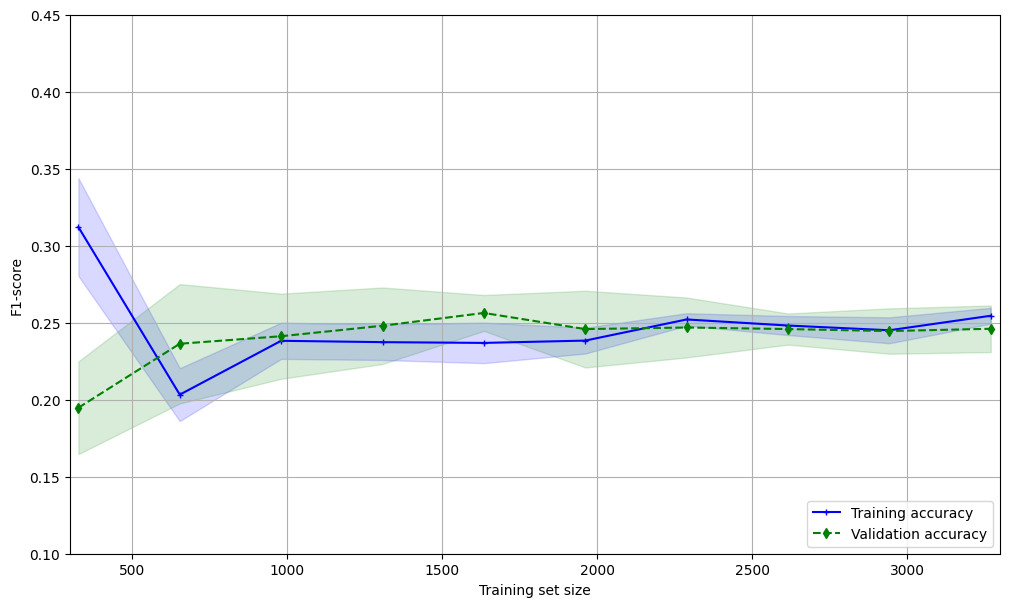

In [40]:
#learning curve to evaluate how the performance of the model varies with the size of the training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.1, 0.45])
ax.set_xlim([300, 3300])

Il grafico mostra la curva di apprendimento (learning curve) per valutare come varia la performance del modello al variare della dimensione del set di addestramento.

La curva blu mostra l'accuratezza del modello sul set di addestramento, mentre la curva verde indica l'accuratezza sul set di validazione. Le aree colorate intorno alle due curve rappresentano la deviazione standard dell'accuratezza.

L'accuratezza del modello diminuisce rapidamente all'aumentare della dimensione del set di addestramento per poi risalire e quindi stabilizzarsi. Non ci sono problemi di overfitting, la linea dell'accuratezza sul set di addestramento non è mai di molto superiore a quella sul set di validazione, quindi non si sta perdendo di generalità.

Le linee disegnate rappresentano la media delle accuracy/f1-score ottenute dal modello sui diversi set di addestramento e di validazione, mentre le aree colorate rappresentano l'intervallo di confidenza associato a tali medie, calcolato in base alle deviazioni standard.


in realtà è una varianza paragonabile a quella dell'es. Del prof e anche più piccola, quindi migliore

il vero problema è che le due curve dovrebbero tendere ad accostarsi nel lato sinistro del grafico e allontanarsi nel lato destro, mentre qui restano distanziate in tutto il grafico

Questo significa che la cd regolarizzazione non ha avuto effetto

Su questa cosa però bisognerebbe cercare di capire perché la regolarizzazione non funziona...

In [41]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_C, 
        param_name='classifier__C',
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

(0.15, 0.4)

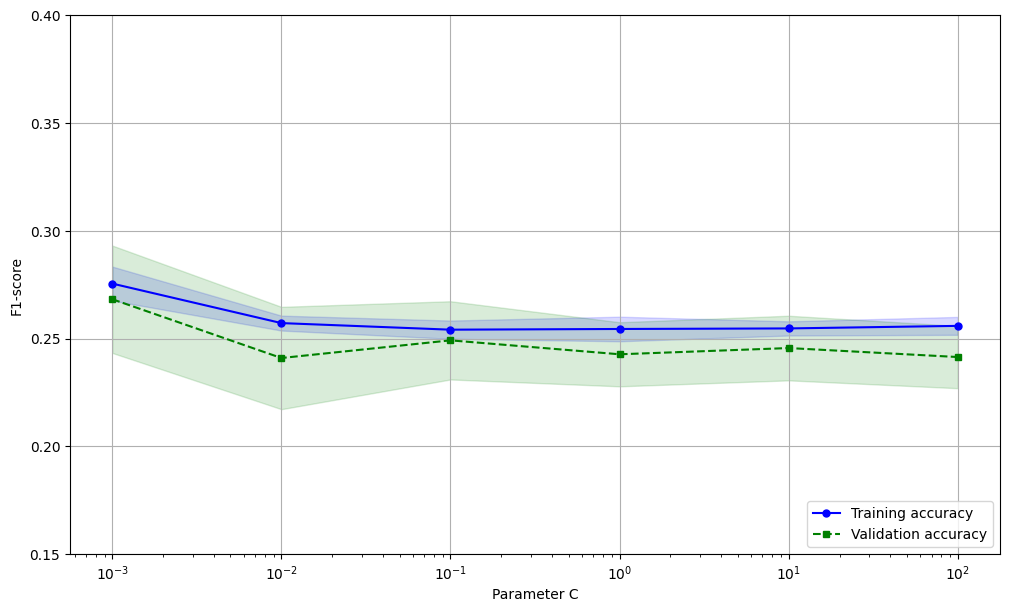

In [42]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_xscale('log')
ax.set_ylim([0.15, 0.40]) 

<a id = '4'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:#fe0b50;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Another round with lifestyle</h1>

Creo una nuova colonna "sport" in base alla condizione che l'individuo:
- non abbia mai fumato ("smoking_status" diverso da "never smoked")
- sia di età inferiore ai 65 anni ("age" minore di 65) 
- non abbia l'ipertensione ("hypertension" uguale a 0)

In [43]:
#loading data
df_stroke_s = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter = ',')

In [44]:
#new cloumn
df_stroke_s['sport'] = df_stroke_s.apply(ut.sport, axis=1).astype('int64')
df_stroke_s.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,sport
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0


In [45]:
#info about DataFrame
df_stroke_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  sport              5110 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 519.1+ KB


There are three types of data in the dataset:
1. *Categorical* : gender, ever_married, work_type, Residence_type, smoking_status
2. *Binary Numerical* : hypertension,heart_disease, stroke
3. *Continous Numerical* : age, avg_glucose_level, bmi

In [46]:
#unique column values with categorical data type
for col in df_stroke_s.select_dtypes('object').columns:
    print(col + "'s value:", df_stroke_s[col].unique().tolist())

gender's value: ['Male', 'Female', 'Other']
ever_married's value: ['Yes', 'No']
work_type's value: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Residence_type's value: ['Urban', 'Rural']
smoking_status's value: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']


In [47]:
df_stroke_s.gender = df_stroke_s.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.int64)
df_stroke_s.ever_married = df_stroke_s.ever_married.replace({'No':0,'Yes':1}).astype(np.int64)
df_stroke_s.work_type = df_stroke_s.work_type.replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.int64)
df_stroke_s.Residence_type = df_stroke_s.Residence_type.replace({'Rural':0,'Urban':1}).astype(np.int64)
df_stroke_s.smoking_status = df_stroke_s.smoking_status.replace({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':-1}).astype(np.int64)

In [48]:
df_stroke_s.bmi.replace(to_replace=np.nan, value=df_stroke_s.bmi.mean(),inplace=True)

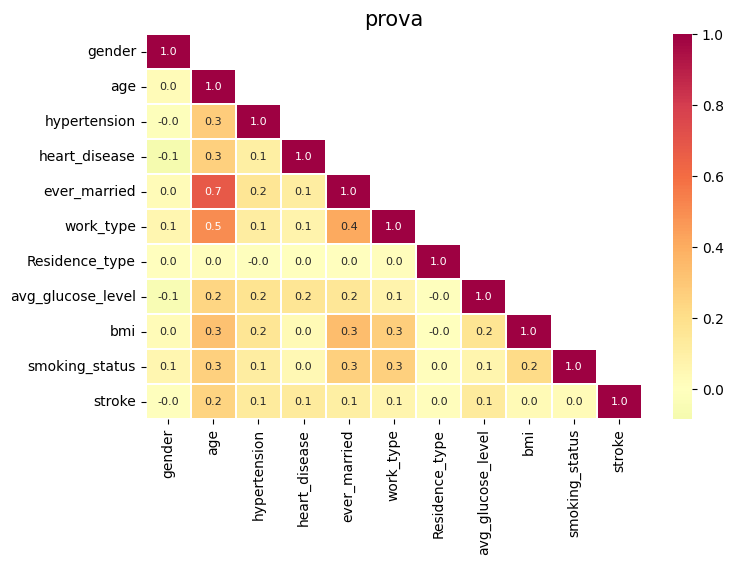

In [49]:
X = df_stroke_s.drop(['id', 'sport'], axis=1)
#Data correlation control
ut.correlation_matrix(X, 'prova')

In [50]:
plt.figure(figsize = (9,7))
sns.heatmap(('smoking_status','hypertension','smoking_status').corr(), annot = True, center = 0)
plt.show()

AttributeError: 'tuple' object has no attribute 'corr'

<Figure size 900x700 with 0 Axes>

<a id = '4.1'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:Green ;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Model Selection: sport</h1>

In [ ]:
#loading data
df_stroke_s = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter = ',')

In [52]:
#new cloumn
df_stroke_s['sport'] = df_stroke_s.apply(ut.sport, axis=1).astype('int64')
df_stroke_s.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,sport
0,9046,0,67.0,0,1,1,0,1,228.69,36.600000,0,1,0
1,51676,1,61.0,0,0,1,1,0,202.21,28.893237,1,1,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.500000,1,1,0


In [ ]:
#stoke's coloumn value
counts = df_stroke_s['sport'].value_counts()
num_zeros = counts[0]
num_one = counts[1]
print(f'The stroke column has {num_zeros} values equal to 0 and {num_one} values equal to 1')

In [ ]:
df_stroke_s.info()

In [ ]:
#setting up the transformations
pip = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

final_transformation = ColumnTransformer(transformers=[
    ('one_hot_encoder', OneHotEncoder(drop='first',categories='auto',handle_unknown='ignore'),['gender','ever_married','work_type','Residence_type', 'smoking_status'] ),
    ('age_column', StandardScaler(),['age']),
    ('bmi_column', pip, ['bmi'] )
],
remainder='passthrough', #non fa nulla sulle colonne non menzionate
verbose_feature_names_out=False,
sparse_threshold=0 #per ottenere l'array
)

In [ ]:
#set data
X = df_stroke_s.drop(['id', 'sport'], axis=1)
y = df_stroke_s['sport']  # select target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, shuffle=True)

In [ ]:
#proceed by defining a starting pipeline
model_pipeline = IMBPipeline([
    ('trans', final_transformation), #transformation of data
    ('sampler', SMOTE()), #balancing y
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [ ]:
#training the model
model_pipeline.fit(X_train,y_train)

In [ ]:
#predict
model_pipeline.predict(X_test)

In [ ]:
#count's predict
np.set_printoptions(threshold=np.inf)
preds = model_pipeline.predict(X_test)
len(preds)

In [ ]:
#possible configurations
sampler_configs = [
    {
        'sampler':[None],#No dampsampling o upsampling 
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None] #No reduction
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [
    {
        'classifier__eta0' : loguniform(0.001,100),
        'classifier': [Perceptron()] ,
        'classifier__max_iter': [1,5,10,15,50,100] ,
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [10,50,100, 500]
    }
]

In [ ]:
#creates possible configurations to be passed to RandomSearchCV object
all_configs = []
for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs):
    # Merging of three dictionary into one
    all_parameters = []
    for element in configuration:
        for item in element.items():
            all_parameters.append(item)
    all_configs.append(dict(all_parameters)) # by dict(all_parameters) we create a dict from a list of pairs (key:value)
    
print(f'Number of possible configurations: {len(all_configs)}')

In [ ]:
#select the best candidates and optimizes hyperparameters 
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=1, #processors (-1 = All)
    cv = 2,
    scoring='f1'
)

In [ ]:
#cross validation
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=5) 

<a id = '4.2'></a>
<h1 style="font-size: 150%;">Outcome</h1>


In [ ]:
#print information on best-performing models
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],'\n',estimator.best_estimator_.get_params()['classifier'].get_params())
    print(f"{scores['test_score'][index]*100:.2f}%")
    print('-'*10)

<a id = '4.3'></a>
<h1 style="font-size: 150%;">Refinement of the selected model</h1>

Previously, we selected one of the best candidate models. Now, we perform the hyperparameter optimization again by fixing the modelling approach and varying the hyperparameters in a range close to that of the selected 

In [ ]:
#implement the above evaluation
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

In [ ]:
#sets best pipline
best_model_pipeline = Pipeline([
    ('trans', final_transformation),
    #('sampler', SMOTE(n_jobs=-1, sampling_strategy='minority')),
    ('feature_selector', SFS(cv=None, estimator=Perceptron(), k_features=(10, 10), scoring='f1')),
    ('classifier', RandomForestClassifier(n_estimators=50))
])

In [ ]:
#set up an even distribution
params = {
    'classifier__max_depth': [None],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [1],
    'classifier__bootstrap': [True],
    'classifier__max_features': ['sqrt']
}

In [ ]:
#random search on the hyperparameters of the model represented by the best_model_pipeline
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring='f1'
)

In [ ]:
#training the model
rs_best.fit(X_train, y_train)

In [ ]:
#model instance with the best found hyperparameters
rs_best.best_estimator_

In [ ]:
#compute the F1-score on the test set
score=f1_score(y_test, rs_best.best_estimator_.predict(X_test))
m_score = round((score * 100), 2)
print(f'f1_score {m_score}%')
    

In [ ]:
cls = rs_best.best_estimator_

In [ ]:
#measuring the performance of the model on training datasets of increasing size and on test datasets
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = 1,
                                                       scoring = 'f1',
                                                       shuffle = False)

<a id = '4.4'></a>
<h1 style="font-size: 150%;">Learning curve</h1>

In [ ]:
#learning curve to evaluate how the performance of the model varies with the size of the training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.80, 1.15])
ax.set_xlim([0, 3300])

Il grafico mostra la curva di apprendimento (learning curve) per valutare come varia la performance del modello al variare della dimensione del set di addestramento.

La curva blu mostra l'accuratezza del modello sul set di addestramento, mentre la curva verde indica l'accuratezza sul set di validazione. Le aree colorate intorno alle due curve rappresentano la deviazione standard dell'accuratezza.

La linea blu rappresenta la precisione sul set di addestramento e mostra che il modello ha una precisione perfetta (valore 1) su tutto il range di dimensioni del set di addestramento. Questo potrebbe indicare che il modello ha una buona capacità di adattamento ai dati di addestramento e potrebbe essere in grado di memorizzare i dati di addestramento piuttosto che generalizzarli.

La linea verde rappresenta la precisione sul set di validazione e mostra che la precisione inizia a un valore inferiore rispetto alla linea blu (circa 0.87) e poi aumenta lentamente per raggiungere il valore della linea blu, sovrapponendosi completamente con essa. Questo potrebbe indicare che il modello sta imparando lentamente dai dati di addestramento e sta iniziando a generalizzare bene ai dati di validazione man mano che la dimensione del set di addestramento aumenta.

in realtà è una varianza paragonabile a quella dell'es. Del prof e anche più piccola, quindi migliore

il vero problema è che le due curve dovrebbero tendere ad accostarsi nel lato sinistro del grafico e allontanarsi nel lato destro, mentre qui restano distanziate in tutto il grafico

Questo significa che la cd regolarizzazione non ha avuto effetto

Su questa cosa però bisognerebbe cercare di capire perché la regolarizzazione non funziona...



In [ ]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_C, 
        param_name='classifier__C',
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.20, 0.30]) 
ax.set_xscale('log')

<a id = '5'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:magenta;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Conclusions</h1>

In [ ]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)


In [ ]:
oversample = SMOTE()
eval_df = df_stroke[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(df_stroke.shape[0]*0.2),random_state=42)
train_df = df_stroke.drop(index=eval_df.index)

X_eval,y_eval = eval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_df['stroke']
X,y = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


X, y = oversample.fit_resample(X,y)
usampled_df = X.assign(Stroke = y)

X_eval,y_eval = oversample.fit_resample(X_eval,y_eval)
usampled_eval_df = X_eval.assign(Stroke = y_eval)

In [ ]:
## binning of numerical variables

df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])


In [ ]:
import pandas as pd

X_train_transformed_array = best_model_pipeline.named_steps['trans'].transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed_array, columns=['gender','ever_married','work_type','Residence_type','smoking_status','age','bmi', 'gender','ever_married','work_type','Residence_type','smoking_status','a','b','age','m'])
X_train_transformed_df